# import the python packages

In [121]:
import pandas as pd # for data handling
import numpy as np # for data manipulation 
import sklearn as sk
from matplotlib import pyplot as plt # for plotting
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder # For encoding class variables
from sklearn.model_selection import train_test_split # for train and test split
from sklearn.svm import SVC # to built svm model
from sklearn import svm # inherits other SVM objects
from sklearn import metrics # to calculate classifiers accuracy
from sklearn.model_selection import cross_val_score # to perform cross validation
from sklearn.preprocessing import StandardScaler # to perform standardization
from sklearn.model_selection import GridSearchCV # to perform grid search for all classifiers
from sklearn import tree # to perform decision tree classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors # to perform knn
from sklearn import naive_bayes # to perform Naive Bayes
from sklearn.metrics import classification_report # produce classifier reports
from sklearn.ensemble import RandomForestClassifier # to perform ensemble bagging - random forest
from sklearn.ensemble import AdaBoostClassifier # to perform ensemble boosting
from sklearn.metrics import roc_curve, auc # to plot ROC Curve
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Manipulation

In [2]:
df_train = pd.read_table('echocardiogram.txt',sep=',',na_values=['?'])
df_train.columns = ["survival", "still-alive", "age-at-heart-attack", "pericardial-effusion","fractional-shortening","epss","lvdd","wall-motion-score","wall-motion-index","mult","name","group","alive-at-1"]


In [3]:
df_train.columns

Index([u'survival', u'still-alive', u'age-at-heart-attack',
       u'pericardial-effusion', u'fractional-shortening', u'epss', u'lvdd',
       u'wall-motion-score', u'wall-motion-index', u'mult', u'name', u'group',
       u'alive-at-1'],
      dtype='object')

In [4]:
df_train.shape

(131, 13)

In [5]:
df_train.head(5)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
1,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
2,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
3,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0
4,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.0,1.00,0.857,name,1.0,0.0


In [7]:
df_train = df_train.sort_values('survival')

In [8]:
df_train = df_train.reset_index()
df_train.head()

,index,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,76,0.03,1.0,NaN,0.0,0.260,19.4,4.77,21.0,2.10,0.714,name,2.0,1.0
1,47,0.25,1.0,63.0,1.0,NaN,NaN,NaN,23.0,2.30,0.714,name,2.0,1.0
2,69,0.25,1.0,86.0,0.0,0.225,12.2,5.20,24.0,2.18,0.786,name,2.0,1.0
3,75,0.25,1.0,68.0,0.0,0.220,21.7,4.85,15.0,1.15,0.928,name,2.0,NaN
4,27,0.25,1.0,75.0,0.0,NaN,NaN,NaN,NaN,1.00,NaN,name,2.0,NaN


# Removal of unnessary Data

In [9]:
del df_train["group"]
del df_train["name"] 
del df_train["wall-motion-score"]
del df_train["mult"]
del df_train["index"]

In [10]:
df_train.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
0,0.03,1.0,NaN,0.0,0.260,19.4,4.77,2.10,1.0
1,0.25,1.0,63.0,1.0,NaN,NaN,NaN,2.30,1.0
2,0.25,1.0,86.0,0.0,0.225,12.2,5.20,2.18,1.0
3,0.25,1.0,68.0,0.0,0.220,21.7,4.85,1.15,NaN
4,0.25,1.0,75.0,0.0,NaN,NaN,NaN,1.00,NaN


In [11]:
lable = df_train.columns
print lable

Index([u'survival', u'still-alive', u'age-at-heart-attack',
       u'pericardial-effusion', u'fractional-shortening', u'epss', u'lvdd',
       u'wall-motion-index', u'alive-at-1'],
      dtype='object')


# Data types of feature

In [12]:
df_train.dtypes

survival                 float64
still-alive              float64
age-at-heart-attack      float64
pericardial-effusion     float64
fractional-shortening    float64
epss                     float64
lvdd                     float64
wall-motion-index        float64
alive-at-1               float64
dtype: object

# Seperating Independent and Target Variables: 

In [24]:
data_x = df_train[lable[0:8]].copy()
data_x = data_x.fillna(value=-1.0)
data_y = df_train[lable[-1]].copy()
data_y = data_y.fillna(value=-1.0)
print('Independent var: \n',data_x.head(10),'\n')
print('Dependent var: \n',data_y.head(10))

('Independent var: \n',    survival  still-alive  age-at-heart-attack  pericardial-effusion  \
0      0.03          1.0               -1.000                   0.0   
1      0.25          1.0               63.000                   1.0   
2      0.25          1.0               86.000                   0.0   
3      0.25          1.0               68.000                   0.0   
4      0.25          1.0               75.000                   0.0   
5      0.50          1.0               73.000                   0.0   
6      0.50          1.0               59.000                   0.0   
7      0.50          1.0               67.000                   0.0   
8      0.50          1.0               62.529                   1.0   
9      0.50          1.0               69.000                   1.0   

   fractional-shortening    epss  lvdd  wall-motion-index  
0                  0.260  19.400  4.77               2.10  
1                 -1.000  -1.000 -1.00               2.30  
2             

# Target Variable Encoding

In [25]:
encode_obj = LabelEncoder()
data_y = encode_obj.fit_transform(data_y)
print('sample values of target values:\n',data_y[0:10])

('sample values of target values:\n', array([2, 2, 2, 0, 0, 2, 0, 0, 2, 2]))


# Setting a benchmark accuracy for classifiers using Raw Data & Naive Bayes

In [26]:
test_x_train,test_x_test,test_y_train,test_y_test = train_test_split(data_x,data_y,train_size=0.75,test_size=0.25,random_state=1)

In [27]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(test_x_train, test_y_train)
nbpreds_test = nbclf.predict(test_x_test)
print('Accuracy obtained from train-test split on training data is:',nbclf.score(test_x_train, test_y_train))
print('Accuracy obtained from train-test split on testing data is:',nbclf.score(test_x_test, test_y_test))

('Accuracy obtained from train-test split on training data is:', 0.58163265306122447)
('Accuracy obtained from train-test split on testing data is:', 0.60606060606060608)


In [28]:
test_eval_result = cross_val_score(nbclf, data_x, data_y, cv=10, scoring='accuracy')
print('Accuracy obtained from 10-fold cross validation on actual raw data is:',test_eval_result.mean())

('Accuracy obtained from 10-fold cross validation on actual raw data is:', 0.55232267732267737)


In [29]:
data_y = df_train[lable[-1]].copy()
data_y = data_y.fillna(value=-1.0)

# Exploratory Data Analysis 

(array([   1.,    0.,    0.,    0.,    0.,  106.,    0.,    0.,    0.,   24.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

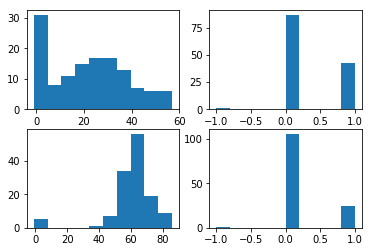

In [22]:
plt.subplot(221)
plt.hist(data_x['survival'])
plt.subplot(222)
plt.hist(data_x['still-alive'])
plt.subplot(223)
plt.hist(data_x['age-at-heart-attack'])
plt.subplot(224)
plt.hist(data_x['pericardial-effusion'])

# Variable survival is normally distributed and variables still-alive, age-at-heart-attack,pericardial-effusion are skewed to the right 

(array([  1.,   0.,   0.,   0.,   0.,  84.,  23.,  12.,   9.,   2.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 10 Patch objects>)

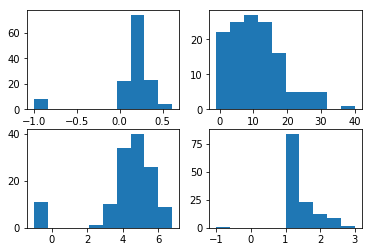

In [23]:
plt.subplot(221)
plt.hist(data_x['fractional-shortening'])
plt.subplot(222)
plt.hist(data_x['epss'])
plt.subplot(223)
plt.hist(data_x['lvdd'])
plt.subplot(224)
plt.hist(data_x['wall-motion-index'])

# Variable epss is normally distributed and variables fractional-shortening,       vdd,wall-motion-index are skewed to the right 

# Data Mungling and Data Reduction

In [30]:
data_y = data_y.to_frame(name='alive-at-1')

In [31]:
data_x1 = data_x[((data_x['survival'] > -0.1) & (data_x['still-alive'] > -0.1)) & (data_x['age-at-heart-attack'] > -0.1) & (data_x['pericardial-effusion'] > -0.1) & (data_x['fractional-shortening'] > -0.1) & (data_x['epss'] > -0.1) & (data_x['lvdd'] > -0.1) & (data_x['wall-motion-index'] > -0.1)]
data_y1 = data_y[data_y['alive-at-1'] > -0.1]

In [32]:
data_y1.head()

,alive-at-1
0,1.0
1,1.0
2,1.0
5,1.0
8,1.0


In [37]:
data_y1 = data_y1.reset_index()
del data_y1["index"]
del data_y1["level_0"]

In [38]:
data_y1.head()

,alive-at-1
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [39]:
data_y1.shape

(73, 1)

In [40]:
data_x1.shape

(106, 8)

In [41]:
data_x1 = data_x1.reset_index()
del data_x1["index"]
data_x1.head(5)

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index
0,0.25,1.0,86.0,0.0,0.225,12.200,5.20,2.18
1,0.25,1.0,68.0,0.0,0.220,21.700,4.85,1.15
2,0.50,1.0,73.0,0.0,0.230,12.733,6.06,1.50
3,0.50,1.0,59.0,0.0,0.130,16.400,4.96,1.37
4,0.50,1.0,67.0,0.0,0.155,11.300,5.16,1.00


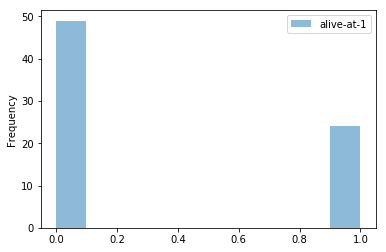

In [48]:
plt.figure() 
data_y1.plot.hist(alpha=0.5)

# Validating the cleaned dataset with benchmark accuracy obtained

In [49]:
nbclf = naive_bayes.GaussianNB()
data_x1 = data_x1.drop(data_x1.index[73:])
data_x1_train,data_x1_test,data_y1_train,data_y1_test = train_test_split(data_x1,data_y1,train_size=0.8,test_size=0.2,random_state=1)

In [50]:
data_x1_train.shape

(58, 8)

In [51]:
data_x1_test.shape

(15, 8)

In [52]:
data_y1_train.shape

(58, 1)

In [53]:
data_y1_test.shape

(15, 1)

In [54]:
nbclf = nbclf.fit(data_x1_train, data_y1_train)
nbpreds_test = nbclf.predict(data_x1_test)
nb_eval_result1 = cross_val_score(nbclf, data_x1, data_y1, cv=10, scoring='accuracy')
print('Mean accuracy with 10 fold cross validation on Naive Bayes with treated data: ',nb_eval_result1.mean())

('Mean accuracy with 10 fold cross validation on Naive Bayes with treated data: ', 0.91904761904761911)


# Core Model Building with SVM Classifier

In [55]:
def funct_svm(kernal_type,xTrain,yTrain,xTest,yTest):
    svm_obj=SVC(kernel=kernal_type)
    svm_obj.fit(xTrain,yTrain)
    yPredicted=svm_obj.predict(xTest)
    print('Accuracy Score of',kernal_type,'Kernal SVM is:',metrics.accuracy_score(yTest,yPredicted))
    return metrics.accuracy_score(yTest,yPredicted)

In [56]:
%timeit 10
PN_linear_result = funct_svm('linear',data_x1_train,data_y1_train,data_x1_test,data_y1_test)

The slowest run took 46.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 52.4 ns per loop
('Accuracy Score of', 'linear', 'Kernal SVM is:', 1.0)


In [57]:
%timeit 10
PN_rbf_result = funct_svm('rbf',data_x1_train,data_y1_train,data_x1_test,data_y1_test)

The slowest run took 56.25 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 53.7 ns per loop
('Accuracy Score of', 'rbf', 'Kernal SVM is:', 0.93333333333333335)


In [58]:
%timeit 10
PN_poly_result = funct_svm('poly',data_x1_train,data_y1_train,data_x1_test,data_y1_test)

10000000 loops, best of 3: 53.2 ns per loop
('Accuracy Score of', 'poly', 'Kernal SVM is:', 0.93333333333333335)


In [59]:
%timeit 10
PN_sigmoid_result = funct_svm('sigmoid',data_x1_train,data_y1_train,data_x1_test,data_y1_test)

The slowest run took 24.04 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 50.2 ns per loop
('Accuracy Score of', 'sigmoid', 'Kernal SVM is:', 0.80000000000000004)


# Parameter tuning on the best Kernal for SVM with 5-fold cross validation

In [64]:
def funct_tune_svm(kernal_type,margin_val,xData,yData,k,eval_param):
    if(kernal_type=='poly'):
        svm_obj=SVC(kernel=kernal_type,degree=margin_val) 
    eval_result = cross_val_score(svm_obj, xData, yData, cv=k, scoring=eval_param)
    return eval_result.mean()

In [65]:
accu_list = list()
for c in np.arange(0.1,10,1):
    result = funct_tune_svm('poly',c,data_x1,data_y1,5,'accuracy')
    accu_list.append(result)

In [66]:
np.arange(0.1,10,1)

array([ 0.1,  1.1,  2.1,  3.1,  4.1,  5.1,  6.1,  7.1,  8.1,  9.1])

Text(0,0.5,u'Cross-Validated Accuracy')

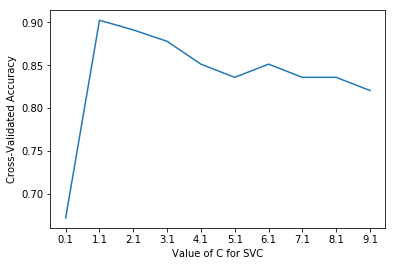

In [67]:
C_values=list(np.arange(0.1,10,1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,accu_list)
plt.xticks(np.arange(0.1,10,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [68]:
tuning_poly_svm = pd.DataFrame(columns=['Parameter Degree', 'Accuracy'])
tuning_poly_svm['Parameter Degree'] = np.arange(0.1,10,1)
tuning_poly_svm['Accuracy'] = accu_list
tuning_poly_svm

,Parameter Degree,Accuracy
0,0.1,0.671795
1,1.1,0.902564
2,2.1,0.891282
3,3.1,0.877949
4,4.1,0.851282
5,5.1,0.835897
6,6.1,0.851282
7,7.1,0.835897
8,8.1,0.835897
9,9.1,0.820513


# Visualization of kernal Margin and boundries

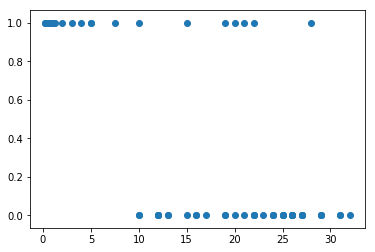

In [71]:
plt.scatter(data_x1['survival'],data_x1['still-alive'])

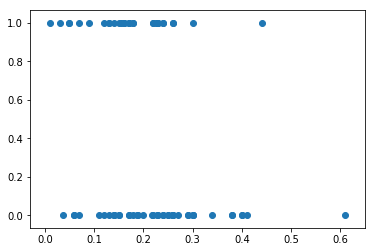

In [74]:
plt.scatter(data_x1['fractional-shortening'],data_x1['still-alive'])

# Visualizing the margin modeled 

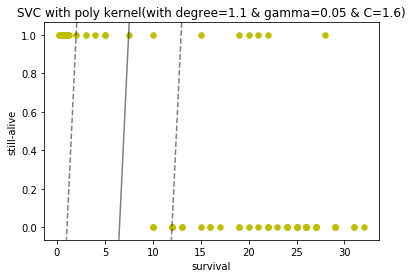

In [75]:
X = data_x1[['survival','still-alive']].copy()
X = np.array(X)
y = np.array(data_y1)

# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='poly', degree=1.1, gamma = 0.05,C=1.6)
clf.fit(X, y)

# title for the plots
title = ('SVC with poly kernel(with degree=1.1 & gamma=0.05 & C=1.6)')

plt.scatter(X[:,0], X[:,1], c='y', s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
ax.set_xlabel('survival')
ax.set_ylabel('still-alive')
ax.set_title(title)
plt.show()


In [91]:
final_model = SVC(kernel='poly', C=1.6, gamma=0.005, degree=1)
print('Final Model Detail:\n',final_model)
final_model_score = final_model.fit(data_x1_train, data_y1_train).decision_function(data_x1_test)
# CV Accuracy 
final_eval_result = cross_val_score(final_model, data_x1, data_y1, cv=10, scoring='accuracy')
print('\nAccuracy obtained from final model with 10 fold CV:\n',final_eval_result.mean())
# ROC measure
fpr, tpr, _ = roc_curve(data_y1_test,final_model_score)
roc_auc= auc(fpr, tpr)
print('\nROC Computed Area Under Curve:\n',roc_auc)

('Final Model Detail:\n', SVC(C=1.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.005, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
('\nAccuracy obtained from final model with 10 fold CV:\n', 0.97083333333333344)
('\nROC Computed Area Under Curve:\n', 1.0)


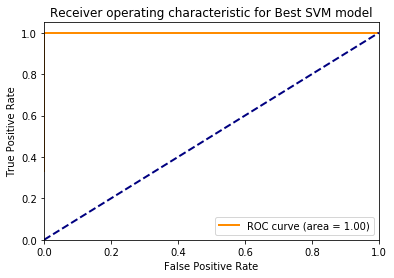

In [92]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Best SVM model')
plt.legend(loc="lower right")
plt.show()

# Personal idea

In [105]:
col_name =data_y1.columns[0]
data_y1=data_y1.rename(columns = {col_name:'DoA'})

In [106]:
Person = []
for row in data_y1['DoA']:
    if row == 1.0:
        Person.append('Alive')
    else:
        Person.append('Dead')
        
        
data_y1['Person'] = Person   

In [107]:
data_y1.head(30)

,DoA,Person
0,1.0,Alive
1,1.0,Alive
2,1.0,Alive
3,1.0,Alive
4,1.0,Alive
5,1.0,Alive
6,1.0,Alive
7,1.0,Alive
8,1.0,Alive
9,1.0,Alive


In [109]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [111]:
knn.fit(data_x1_train, data_y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
knn.score(data_x1_test,data_y1_test)

1.0

In [114]:
Result =  dict(zip(data_y1.DoA.unique() , data_y1.Person.unique()))
Result

{0.0: 'Dead', 1.0: 'Alive'}

# Let's test the Prediction Model

# Test 1

In [ ]:
Result_after_one_year = knn.predict([[0.50,1.0,59.0,0.0,0.130,16.400,4.96,1.37]])
Result_after_one_year

In [116]:
Result_after_one_year = int(Result_after_one_year)
Result[Result_after_one_year]

'Alive'

# Test 2

In [117]:
Result_after_one_year = knn.predict([[19.00,0.0,46.000,0.0,0.340,0.000,5.090,1.140]])
Result_after_one_year

array([ 0.])

In [118]:
Result_after_one_year = int(Result_after_one_year)
Result[Result_after_one_year]

'Dead'

# Final Result Graph 

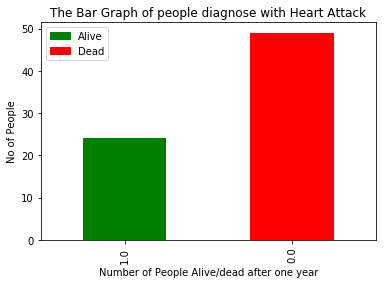

In [122]:
pd.Series(data_y1.DoA).value_counts().sort_values().plot(kind='bar',color='gr')
plt.title("The Bar Graph of people diagnose with Heart Attack")
plt.ylabel('No of People')
plt.xlabel('Number of People Alive/dead after one year')

NA = mpatches.Patch(color='green', label='Alive')
EU = mpatches.Patch(color='red', label='Dead')
plt.legend(handles=[NA,EU,], loc=2)